In [1]:
import pandas as pd
import numpy as np

In [2]:
CCTV_Seoul = pd.read_csv('../data/01.CCTV_in_Seoul.csv',
                         header=1,
                         encoding='CP949')
CCTV_Seoul.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76


In [3]:
CCTV_Seoul.columns

Index(['구분', '총계', '2012년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [4]:
pop_Seoul = pd.read_excel('../data/01.Population_in_Seoul.xls',
                          header=2,
                          usecols ='B,D,G,J,N',
                          encoding="utf-8")
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9795426,9565990,229436,1576971
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591


In [5]:
pop_Seoul.rename(columns={pop_Seoul.columns[0]:"구별",
                          pop_Seoul.columns[1]:"인구수",
                          pop_Seoul.columns[2]:"한국인",
                          pop_Seoul.columns[3]:"외국인",
                          pop_Seoul.columns[4]:"고령자"},inplace=True) #inplace= T >> 바로 변수 갱신
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9795426,9565990,229436,1576971
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591


In [6]:
s=pd.Series([1,3,5,np.nan,6,8]) #Pandas의 기초는 Series
s  #NaN의 형태는 float64

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
dates = pd.date_range('20130101',periods=6) #6일간  #날짜형의 데이터는 date_range를 사용 
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-02,-0.853250,0.510521,-1.144477,0.644012
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675
2013-01-04,-0.157408,0.619080,0.893398,0.551899
2013-01-05,2.073485,1.340412,-1.173294,0.448044
2013-01-06,1.382293,-0.818216,0.088780,-0.373508


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.values

array([[ 0.65968942,  1.90993427, -0.1185533 , -1.21696867],
       [-0.85324965,  0.51052084, -1.1444767 ,  0.64401195],
       [-0.52160585,  1.23662333, -0.44474818, -1.06267503],
       [-0.15740832,  0.61908005,  0.89339796,  0.55189914],
       [ 2.07348541,  1.34041197, -1.17329386,  0.44804376],
       [ 1.38229255, -0.81821649,  0.08878   , -0.37350772]])

In [11]:
df.info() #info()다. 괄호 ㄱ

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [12]:
df.describe() #간단한 통계 모두 알수잇음(평균,표준편차,최소,최대)

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.430534,0.799726,-0.316482,-0.168199
std,1.145250,0.943376,0.787829,0.836677
min,-0.853250,-0.818216,-1.173294,-1.216969
25%,-0.430556,0.537661,-0.969545,-0.890383
50%,0.251141,0.927852,-0.281651,0.037268
75%,1.201642,1.314465,0.036947,0.525935
max,2.073485,1.909934,0.893398,0.644012


In [13]:
df.sort_values(by='B',ascending=False) #열 기준 정렬 기능 

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-05,2.073485,1.340412,-1.173294,0.448044
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675
2013-01-04,-0.157408,0.619080,0.893398,0.551899
2013-01-02,-0.853250,0.510521,-1.144477,0.644012
2013-01-06,1.382293,-0.818216,0.088780,-0.373508


In [14]:
df['A'] #Series로 표현됨. 

2013-01-01    0.659689
2013-01-02   -0.853250
2013-01-03   -0.521606
2013-01-04   -0.157408
2013-01-05    2.073485
2013-01-06    1.382293
Freq: D, Name: A, dtype: float64

In [15]:
df[0:3] #행의 범위 슬라이싱으로 지정 ,index로 지정해도됨.

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-02,-0.853250,0.510521,-1.144477,0.644012
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675


In [16]:
df['20130101':'20130105'] #문자열 슬라이싱은 끝도 포함 ㅇㅇ 

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-02,-0.853250,0.510521,-1.144477,0.644012
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675
2013-01-04,-0.157408,0.619080,0.893398,0.551899
2013-01-05,2.073485,1.340412,-1.173294,0.448044


In [17]:
df.loc[dates[0]]

A    0.659689
B    1.909934
C   -0.118553
D   -1.216969
Name: 2013-01-01 00:00:00, dtype: float64

In [18]:
df.loc[dates[0:3]]

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-02,-0.853250,0.510521,-1.144477,0.644012
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675


In [19]:
df.loc[:,['A','B']] #행인덱싱, 열 인덱싱 

#df.loc[행 인덱싱값], df.loc[행 인덱싱값, 열 인덱싱값]

,A,B
2013-01-01,0.659689,1.909934
2013-01-02,-0.853250,0.510521
2013-01-03,-0.521606,1.236623
2013-01-04,-0.157408,0.619080
2013-01-05,2.073485,1.340412
2013-01-06,1.382293,-0.818216


In [20]:
df.loc['20130102',['A','B']] #행 하나 OR 열 하나면 SERIES로 표현 

A   -0.853250
B    0.510521
Name: 2013-01-02 00:00:00, dtype: float64

In [21]:
df.loc[dates[0],'A']

0.6596894226356957

In [22]:
df.iloc[3] #4번째 행 #iloc의 i는 integer라 보면 됨 ㅇㅇ 

A   -0.157408
B    0.619080
C    0.893398
D    0.551899
Name: 2013-01-04 00:00:00, dtype: float64

In [23]:
df.iloc[:2,2]

2013-01-01   -0.118553
2013-01-02   -1.144477
Freq: D, Name: C, dtype: float64

In [24]:
df.iloc[:2,2:]  #df.iloc[행인덱스], df.iloc[행인덱스, 열인덱스]

,C,D
2013-01-01,-0.118553,-1.216969
2013-01-02,-1.144477,0.644012


In [25]:
df.iloc[-1]

A    1.382293
B   -0.818216
C    0.088780
D   -0.373508
Name: 2013-01-06 00:00:00, dtype: float64

In [26]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.853250,-1.144477
2013-01-03,-0.521606,-0.444748
2013-01-05,2.073485,-1.173294


In [27]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.853250,0.510521,-1.144477,0.644012
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675


In [28]:
df.A > 0

2013-01-01     True
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05     True
2013-01-06     True
Freq: D, Name: A, dtype: bool

In [29]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-05,2.073485,1.340412,-1.173294,0.448044
2013-01-06,1.382293,-0.818216,0.088780,-0.373508


In [30]:
df.loc[df.A>0]

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-05,2.073485,1.340412,-1.173294,0.448044
2013-01-06,1.382293,-0.818216,0.088780,-0.373508


In [31]:
df[df>0] #데이터 전체에 조건을 걸면 만족하지 않는 곳은 NaN처리 ㅠ

,A,B,C,D
2013-01-01,0.659689,1.909934,NaN,NaN
2013-01-02,NaN,0.510521,NaN,0.644012
2013-01-03,NaN,1.236623,NaN,NaN
2013-01-04,NaN,0.619080,0.893398,0.551899
2013-01-05,2.073485,1.340412,NaN,0.448044
2013-01-06,1.382293,NaN,0.088780,NaN


In [32]:
df2=df.copy() #DataFrame 복사방법. 데이터까지 
df2

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-02,-0.853250,0.510521,-1.144477,0.644012
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675
2013-01-04,-0.157408,0.619080,0.893398,0.551899
2013-01-05,2.073485,1.340412,-1.173294,0.448044
2013-01-06,1.382293,-0.818216,0.088780,-0.373508


In [33]:
df2["E"]=['one','two','three','four','five','six'] #리스트나 배열로 정의하면 됨 .
df2

,A,B,C,D,E
2013-01-01,0.659689,1.909934,-0.118553,-1.216969,one
2013-01-02,-0.853250,0.510521,-1.144477,0.644012,two
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675,three
2013-01-04,-0.157408,0.619080,0.893398,0.551899,four
2013-01-05,2.073485,1.340412,-1.173294,0.448044,five
2013-01-06,1.382293,-0.818216,0.088780,-0.373508,six


In [34]:
df2["E"].isin(['two','four']) #2또는 4가 있는지 확인 isin??

2013-01-01    False
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05    False
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [35]:
df2[df2["E"].isin(['two','four'])] #참인 행만 반환 

,A,B,C,D,E
2013-01-02,-0.853250,0.510521,-1.144477,0.644012,two
2013-01-04,-0.157408,0.619080,0.893398,0.551899,four


In [36]:
df

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-02,-0.853250,0.510521,-1.144477,0.644012
2013-01-03,-0.521606,1.236623,-0.444748,-1.062675
2013-01-04,-0.157408,0.619080,0.893398,0.551899
2013-01-05,2.073485,1.340412,-1.173294,0.448044
2013-01-06,1.382293,-0.818216,0.088780,-0.373508


In [37]:
df.apply(np.cumsum) #np.cumsum은 누적합 (열별로)
#apply를 사용해 특정함수 적용시킬 수 있음 

,A,B,C,D
2013-01-01,0.659689,1.909934,-0.118553,-1.216969
2013-01-02,-0.193560,2.420455,-1.263030,-0.572957
2013-01-03,-0.715166,3.657078,-1.707778,-1.635632
2013-01-04,-0.872574,4.276158,-0.814380,-1.083733
2013-01-05,1.200911,5.616570,-1.987674,-0.635689
2013-01-06,2.583204,4.798354,-1.898894,-1.009197


In [38]:
df.apply(lambda x:x.max()-x.min())  #마찬가지로 열별로 적용 

A    2.926735
B    2.728151
C    2.066692
D    1.860981
dtype: float64

In [39]:
CCTV_Seoul.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76


In [40]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        26 non-null     object
 1   총계        26 non-null     int64 
 2   2012년 이전  26 non-null     int64 
 3   2012년     26 non-null     int64 
 4   2013년     26 non-null     int64 
 5   2014년     26 non-null     int64 
 6   2015년     26 non-null     int64 
 7   2016년     26 non-null     int64 
 8   2017년     26 non-null     int64 
 9   2018년     26 non-null     int64 
 10  2019년     26 non-null     int64 
 11  2020년     26 non-null     int64 
 12  2021년     26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.6+ KB


In [41]:
CCTV_Seoul.sort_values(by="총계",ascending=True).head() #총계 기준으로 정렬 

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
10,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
20,동작구,2297,41,24,25,503,128,253,271,300,322,419,11
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
18,금천구,2374,0,0,178,80,361,133,196,540,369,508,9


In [42]:
CCTV_Seoul.sort_values(by="총계",ascending=False).head() #총계 기준으로 정렬 

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
23,강남구,6502,124,77,75,597,840,1310,999,748,789,942,1
21,관악구,4942,428,205,291,513,529,621,687,663,640,331,34
17,구로구,4075,852,216,349,187,268,326,540,488,434,415,0
8,성북구,3958,83,78,170,230,323,594,460,867,714,251,188


In [43]:
df=CCTV_Seoul.loc[:,"총계":'2021년']
df=df.astype(int)

In [44]:
CCTV_Seoul['2018년 이전'] = (CCTV_Seoul['2012년 이전']) +(CCTV_Seoul['2013년']) + (CCTV_Seoul['2014년'])+\
                           (CCTV_Seoul['2015년']) + (CCTV_Seoul['2016년']) + (CCTV_Seoul['2017년']) + (CCTV_Seoul['2018년'])

CCTV_Seoul.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2018년 이전
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608,50131
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,1520
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289,1414
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,1388
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,2678


In [45]:
CCTV_Seoul.drop(['2012년 이전','2012년','2013년','2014년','2015년','2016년','2017년','2018년'],
                axis=1,inplace=True) #drop을 사용해서 여러 열 삭제, 직접 컬럼명 지정해야하는듯
                                     #axis=1 >> 열기준, axis=0(default) >> 행기준 
                                     #inplace=True DataFrame객체에 바로 적용 

In [46]:
CCTV_Seoul.head()

,구분,총계,2019년,2020년,2021년,2018년 이전
0,계,77032,11961,11132,1608,50131
1,종로구,1772,9,200,43,1520
2,중 구,2333,155,361,289,1414
3,용산구,2383,307,617,0,1388
4,성동구,3602,262,461,76,2678


In [47]:
CCTV_Seoul = CCTV_Seoul.reindex(columns=['구분','2018년 이전','2019년','2020년','2021년','총계'])

#reindex 명령을 사용해 컬럼위치를 직접 재정렬 할 수 있다.

CCTV_Seoul.head()

,구분,2018년 이전,2019년,2020년,2021년,총계
0,계,50131,11961,11132,1608,77032
1,종로구,1520,9,200,43,1772
2,중 구,1414,155,361,289,2333
3,용산구,1388,307,617,0,2383
4,성동구,2678,262,461,76,3602


In [48]:
CCTV_Seoul['최근증가율']= 100* (CCTV_Seoul['2019년']+CCTV_Seoul['2020년']+CCTV_Seoul['2021년'])/CCTV_Seoul['2018년 이전']
CCTV_Seoul.head()  

#2018년 이전 대비 2019년부터 2021년까지 도입된 CCTV의 개수를 최근증가율이라고 정의.

,구분,2018년 이전,2019년,2020년,2021년,총계,최근증가율
0,계,50131,11961,11132,1608,77032,49.272905
1,종로구,1520,9,200,43,1772,16.578947
2,중 구,1414,155,361,289,2333,56.930693
3,용산구,1388,307,617,0,2383,66.570605
4,성동구,2678,262,461,76,3602,29.835698


In [49]:
CCTV_Seoul.sort_values(by='최근증가율',ascending=False).head()

#강북구, 중랑구, 송파구 TOP 3

,구분,2018년 이전,2019년,2020년,2021년,총계,최근증가율
9,강북구,835,1000,588,39,2462,194.850299
7,중랑구,1280,1049,939,4,3296,155.625000
24,송파구,1389,1068,235,101,2854,101.079914
10,도봉구,910,198,168,331,1629,76.593407
3,용산구,1388,307,617,0,2383,66.570605


In [50]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9795426,9565990,229436,1576971
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591


In [51]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      26 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1000.0+ bytes


In [52]:
pop_Seoul.drop([0],inplace=True) #axis 안쓰면 행,인덱스명으로 삭제하면 됨 / drop: dataframe 행 or열 삭제 

In [53]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591
5,광진구,355306,342481,12825,50815


In [54]:
pop_Seoul['구별'].unique() #중복항목 제거 >> 총 25개구

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [55]:
pop_Seoul['구별'].isnull() #NaN있는지 확인 . isnull()로 확인가능

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
Name: 구별, dtype: bool

In [56]:
pop_Seoul['외국인비율']=100*pop_Seoul['외국인']/pop_Seoul['인구수']
pop_Seoul['고령자비율']=100*pop_Seoul['고령자']/pop_Seoul['인구수']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,155106,146029,9077,27605,5.852127,17.797506
2,중구,132259,123016,9243,23980,6.988560,18.131091
3,용산구,240665,226378,14287,38884,5.936468,16.156899
4,성동구,295767,289162,6605,45591,2.233177,15.414499
5,광진구,355306,342481,12825,50815,3.609565,14.301757


In [57]:
pop_Seoul.sort_values(by="고령자",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664341,658670,5671,95164,0.853628,14.324571
16,강서구,582995,577519,5476,90404,0.939288,15.506823
11,노원구,520005,515997,4008,86697,0.770762,16.672340
12,은평구,479409,475371,4038,85921,0.842287,17.922275
21,관악구,502698,488800,13898,78647,2.764682,15.644980


In [58]:
pop_Seoul.sort_values(by="고령자비율",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,306093,302645,3448,63383,1.126455,20.707105
10,도봉구,322419,320365,2054,62894,0.637059,19.506915
2,중구,132259,123016,9243,23980,6.988560,18.131091
12,은평구,479409,475371,4038,85921,0.842287,17.922275
1,종로구,155106,146029,9077,27605,5.852127,17.797506


강북,도봉 마음이 아프다.. 강북은 이미 초고령사회에 진입하였다(20% 이상)

In [59]:
pop_Seoul.sort_values(by="외국인비율",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,132259,123016,9243,23980,6.988560,18.131091
19,영등포구,402375,377421,24954,61571,6.201678,15.301895
17,구로구,424582,399266,25316,71186,5.962570,16.766137
3,용산구,240665,226378,14287,38884,5.936468,16.156899
18,금천구,244685,230168,14517,40181,5.932934,16.421522


In [60]:
pop_Seoul.sort_values(by="외국인",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,424582,399266,25316,71186,5.962570,16.766137
19,영등포구,402375,377421,24954,61571,6.201678,15.301895
18,금천구,244685,230168,14517,40181,5.932934,16.421522
3,용산구,240665,226378,14287,38884,5.936468,16.156899
6,동대문구,352259,338040,14219,61262,4.036519,17.391181


In [61]:
pop_Seoul.sort_values(by="인구수",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664341,658670,5671,95164,0.853628,14.324571
16,강서구,582995,577519,5476,90404,0.939288,15.506823
23,강남구,536107,531375,4732,76184,0.882660,14.210596
11,노원구,520005,515997,4008,86697,0.770762,16.672340
21,관악구,502698,488800,13898,78647,2.764682,15.644980


In [62]:
df1=pd.DataFrame({"A":['A0','A1','A2','A3'],
                  'B':['B0','B1','B2','B3'],
                  'C':['C0','C1','C2','C3'],
                  'D':['D0','D1','D2','D3']},
                  index = [0,1,2,3])
df2=pd.DataFrame({"A":['A4','A5','A6','A7'],
                  'B':['B4','B5','B6','B7'],
                  'C':['C4','C5','C6','C7'],
                  'D':['D4','D5','D6','D7']},
                  index = [4,5,6,7])
df3=pd.DataFrame({"A":['A8','A9','A10','A11'],
                  'B':['B8','B9','B10','B11'],
                  'C':['C8','C9','C10','C11'],
                  'D':['D8','D9','D10','D11']},
                  index = [8,9,10,11])

In [63]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [64]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [65]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [66]:
result = pd.concat([df1,df2,df3])  #열방향으로 합쳐라(수직)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [67]:
result = pd.concat([df1,df2,df3], keys=['x','y','z'])  #key옵션 쓰면 다중 index가 되어 level 형성(Multiindex)
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [68]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [69]:
result.index.get_level_values(0)  #level 0의 index를 가져와라 

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [70]:
result.index.get_level_values(1) #level 1의 index를 가져와라 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [71]:
df4=pd.DataFrame({'B':['B2','B3','B6','B7'],
                  'D':['D2','D3','D6','D7'],
                  'F':['F2','F3','F6','F7']},
                  index = [2,3,6,7])


result = pd.concat([df1,df4],axis=1)  #axis=1이면 행방향으로 바뀜. axis는 방향을 바꾸는 역할이다.주구장창 

In [72]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [73]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [74]:
result #concat은 index 기준으로 합칩니다.. 인덱스가 없는 곳은 NaN 처리 

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [75]:
result = pd.concat([df1,df4],axis=1,join="inner") #공통부분만 살아남음 
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [76]:
result = pd.concat([df1,df4],axis=1).reindex(df1.index) #reindex를 통해 기준 index를 재지정 할수있음.
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [77]:
result = pd.concat([df1,df4],ignore_index=True) # 두데이터 기존 인덱스 무시후 합체, 이후 재인덱싱
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [78]:
left=pd.DataFrame({'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3'],
                   'key':['K0','K4','K2','K3']})
right=pd.DataFrame({'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3'],
                    'key':['K0','K1','K2','K3']})
                  

In [79]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K4
2,A2,B2,K2
3,A3,B3,K3


In [80]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [81]:
pd.merge(left,right,on="key") #공통된 key에 대해서 합치기!!(on)

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


In [82]:
pd.merge(left,right,how="left",on="key") #left의 key가 기준 

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [83]:
pd.merge(left,right,how="right",on="key") #right의 key 기준 

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3
3,NaN,NaN,K1,C1,D1


In [84]:
pd.merge(left,right,how="outer",on="key")  # left,right key 모두 포함 

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,NaN,NaN,K1,C1,D1


In [85]:
pd.merge(left,right,how="inner",on="key") #key의 교집합 만 ㅇㅇ >> default상태 

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


In [86]:
CCTV_Seoul.head()

,구분,2018년 이전,2019년,2020년,2021년,총계,최근증가율
0,계,50131,11961,11132,1608,77032,49.272905
1,종로구,1520,9,200,43,1772,16.578947
2,중 구,1414,155,361,289,2333,56.930693
3,용산구,1388,307,617,0,2383,66.570605
4,성동구,2678,262,461,76,3602,29.835698


In [87]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:"구별"},inplace=True)
#rename 할떄는 columns={칼럼번호:"바꿀 이름"} dict형식 이용한다. 

In [88]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,155106,146029,9077,27605,5.852127,17.797506
2,중구,132259,123016,9243,23980,6.988560,18.131091
3,용산구,240665,226378,14287,38884,5.936468,16.156899
4,성동구,295767,289162,6605,45591,2.233177,15.414499
5,광진구,355306,342481,12825,50815,3.609565,14.301757
6,동대문구,352259,338040,14219,61262,4.036519,17.391181
7,중랑구,394679,389972,4707,70172,1.192615,17.779512
8,성북구,443206,433658,9548,73568,2.154303,16.599053
9,강북구,306093,302645,3448,63383,1.126455,20.707105
10,도봉구,322419,320365,2054,62894,0.637059,19.506915


In [89]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별") #merge는 column을 합치므로 행방향으로 합친다.
data_result.head() 

,구별,2018년 이전,2019년,2020년,2021년,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1520,9,200,43,1772,16.578947,155106,146029,9077,27605,5.852127,17.797506
1,용산구,1388,307,617,0,2383,66.570605,240665,226378,14287,38884,5.936468,16.156899
2,성동구,2678,262,461,76,3602,29.835698,295767,289162,6605,45591,2.233177,15.414499
3,광진구,1612,712,175,32,2588,57.009926,355306,342481,12825,50815,3.609565,14.301757
4,동대문구,1856,209,223,63,2497,26.670259,352259,338040,14219,61262,4.036519,17.391181


In [90]:
del data_result['2018년 이전']  #drop은 행방향 삭제, del은 열방향 삭제 
del data_result['2019년']
del data_result['2020년']
del data_result['2021년']

data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772,16.578947,155106,146029,9077,27605,5.852127,17.797506
1,용산구,2383,66.570605,240665,226378,14287,38884,5.936468,16.156899
2,성동구,3602,29.835698,295767,289162,6605,45591,2.233177,15.414499
3,광진구,2588,57.009926,355306,342481,12825,50815,3.609565,14.301757
4,동대문구,2497,26.670259,352259,338040,14219,61262,4.036519,17.391181


In [91]:
data_result.set_index('구별',inplace=True) #index 설정하는 메소드 : set_index
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1772,16.578947,155106,146029,9077,27605,5.852127,17.797506
용산구,2383,66.570605,240665,226378,14287,38884,5.936468,16.156899
성동구,3602,29.835698,295767,289162,6605,45591,2.233177,15.414499
광진구,2588,57.009926,355306,342481,12825,50815,3.609565,14.301757
동대문구,2497,26.670259,352259,338040,14219,61262,4.036519,17.391181


In [92]:
np.corrcoef(data_result['고령자비율'],data_result['총계']) #numpy의 corrcoef(correlation coefficient):상관계수 계산하기 

array([[ 1.        , -0.37568372],
       [-0.37568372,  1.        ]])

# 대각선을 기준으로 대칭 행렬, 대각을 제외한 다른 값 읽으면 됨 ex)-0.38

In [93]:
np.corrcoef(data_result['외국인비율'],data_result['총계']) 

array([[ 1.        , -0.12734347],
       [-0.12734347,  1.        ]])

In [94]:
np.corrcoef(data_result['인구수'],data_result['총계']) 

array([[1.        , 0.44006971],
       [0.44006971, 1.        ]])

## 총계와 고령자 비율과는 뚜렷한 음의 상관관계(-0.38), 
## 인구수와는 뚜렷한 양의 상관관계(0.44)

In [95]:
d1=data_result.sort_values(by="총계",ascending=False).head(10)
d1

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,6502,36.906030,536107,531375,4732,76184,0.882660,14.210596
관악구,4942,26.929260,502698,488800,13898,78647,2.764682,15.644980
구로구,4075,28.205980,424582,399266,25316,71186,5.962570,16.766137
성북구,3958,42.280895,443206,433658,9548,73568,2.154303,16.599053
은평구,3791,63.840830,479409,475371,4038,85921,0.842287,17.922275
영등포구,3778,54.387452,402375,377421,24954,61571,6.201678,15.301895
서초구,3704,27.422753,422174,418407,3767,60395,0.892286,14.305713
성동구,3602,29.835698,295767,289162,6605,45591,2.233177,15.414499
양천구,3312,23.527101,454288,450992,3296,66942,0.725531,14.735586


In [96]:
d2=data_result.sort_values(by="인구수",ascending=False).head(10)
d2

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,2854,101.079914,664341,658670,5671,95164,0.853628,14.324571
강서구,2560,62.608696,582995,577519,5476,90404,0.939288,15.506823
강남구,6502,36.906030,536107,531375,4732,76184,0.882660,14.210596
노원구,2415,53.713528,520005,515997,4008,86697,0.770762,16.672340
관악구,4942,26.929260,502698,488800,13898,78647,2.764682,15.644980
은평구,3791,63.840830,479409,475371,4038,85921,0.842287,17.922275
강동구,2547,62.580645,469094,465209,3885,72275,0.828192,15.407360
양천구,3312,23.527101,454288,450992,3296,66942,0.725531,14.735586
성북구,3958,42.280895,443206,433658,9548,73568,2.154303,16.599053


In [97]:
pd.merge(d1,d2,on="구별")

,총계_x,최근증가율_x,인구수_x,한국인_x,외국인_x,고령자_x,외국인비율_x,고령자비율_x,총계_y,최근증가율_y,인구수_y,한국인_y,외국인_y,고령자_y,외국인비율_y,고령자비율_y
구별,,,,,,,,,,,,,,,,
강남구,6502,36.906030,536107,531375,4732,76184,0.882660,14.210596,6502,36.906030,536107,531375,4732,76184,0.882660,14.210596
관악구,4942,26.929260,502698,488800,13898,78647,2.764682,15.644980,4942,26.929260,502698,488800,13898,78647,2.764682,15.644980
구로구,4075,28.205980,424582,399266,25316,71186,5.962570,16.766137,4075,28.205980,424582,399266,25316,71186,5.962570,16.766137
성북구,3958,42.280895,443206,433658,9548,73568,2.154303,16.599053,3958,42.280895,443206,433658,9548,73568,2.154303,16.599053
은평구,3791,63.840830,479409,475371,4038,85921,0.842287,17.922275,3791,63.840830,479409,475371,4038,85921,0.842287,17.922275
양천구,3312,23.527101,454288,450992,3296,66942,0.725531,14.735586,3312,23.527101,454288,450992,3296,66942,0.725531,14.735586


In [98]:
import matplotlib.pyplot as plt #matplotlib.pyplot 그래프 그리는 모듈 
%matplotlib inline

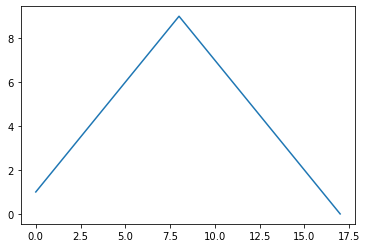

In [99]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [100]:
import numpy as np
t= np.arange(0,12,0.01)
y = np.sin(t) #numpy로 삼각함수 구현 가능하다. ㅇㅇ 

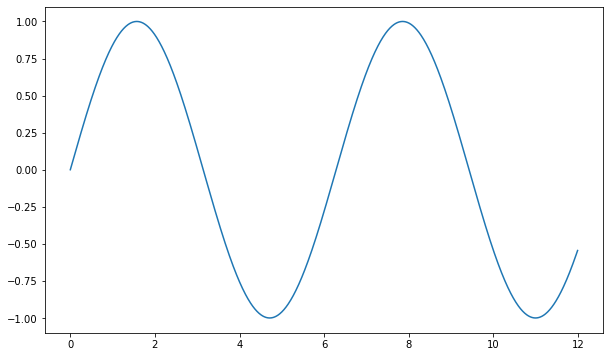

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t,y) #x,y
plt.show()

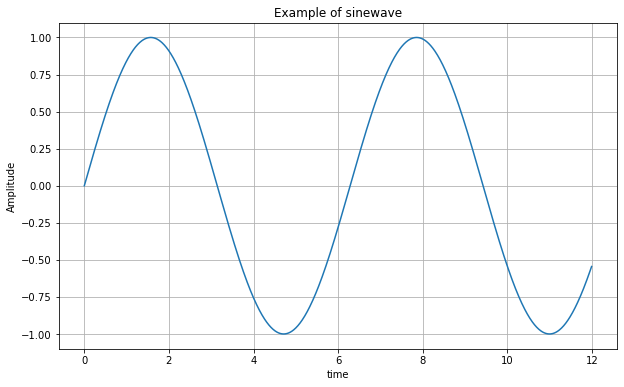

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid() #격자
plt.xlabel('time')  # xlabel, ylabel 축 이름 
plt.ylabel('Amplitude') #진폭 
plt.title('Example of sinewave') #그래프 제목 
plt.show()

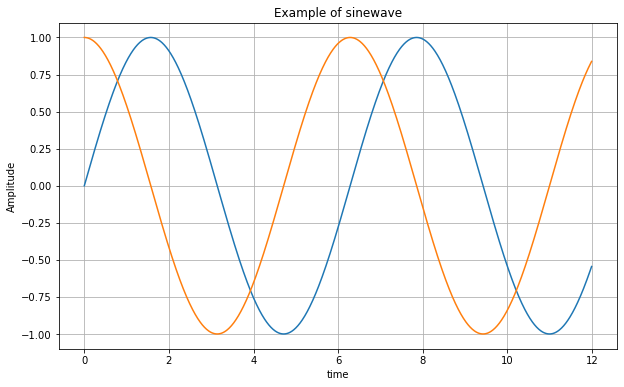

In [103]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t,np.cos(t))

plt.grid() #격자
plt.xlabel('time')  # xlabel, ylabel 축 이름 
plt.ylabel('Amplitude') #진폭 
plt.title('Example of sinewave') #그래프 제목 
plt.show()

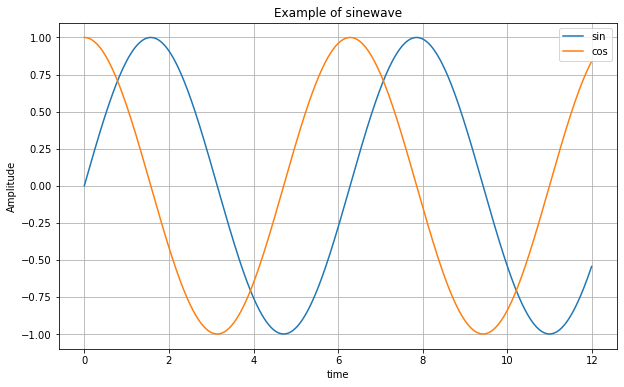

In [104]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),label="sin") #범례를 만들려면 label을 달아줘야한다.(각 그래프의 이름이 있어야 할거 아녀)
plt.plot(t,np.cos(t),label="cos")

plt.grid() #격자
plt.legend(loc="best") #범례
plt.xlabel('time')  # xlabel, ylabel 축 이름 
plt.ylabel('Amplitude') #진폭 
plt.title('Example of sinewave') #그래프 제목 
plt.show()

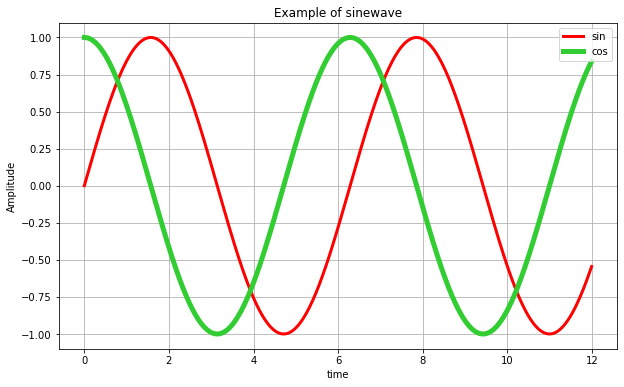

In [105]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),'r',lw=3,label="sin") #범례를 만들려면 label을 달아줘야한다.(각 그래프의 이름이 있어야 할거 아녀)
plt.plot(t,np.cos(t),lw=5,color="limegreen",label="cos") # 포맷 문자열(R,G,B)을 사용하려면 plot(x,y,색상) 3번쨰 위치에 맞춰줘야 한다 
                                                         # color인자를 사용하면 위치 상관없음 

plt.grid() #격자
plt.legend(loc="best") #범례
plt.xlabel('time')  # xlabel, ylabel 축 이름 
plt.ylabel('Amplitude') #진폭 
plt.title('Example of sinewave') #그래프 제목 
plt.show()

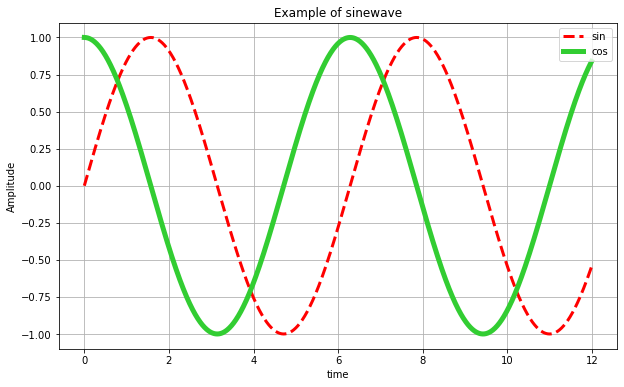

In [106]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),'r',lw=3,linestyle="dashed",label="sin") #범례를 만들려면 label을 달아줘야한다.(각 그래프의 이름이 있어야 할거 아녀)
plt.plot(t,np.cos(t),lw=5,color="limegreen",label="cos") # 포맷 문자열(R,G,B)을 사용하려면 plot(x,y,색상) 3번쨰 위치에 맞춰줘야 한다 
                                                         # color인자를 사용하면 위치 상관없음 

plt.grid() #격자
plt.legend(loc="best") #범례
plt.xlabel('time')  # xlabel, ylabel 축 이름 
plt.ylabel('Amplitude') #진폭 
plt.title('Example of sinewave') #그래프 제목 
plt.show()

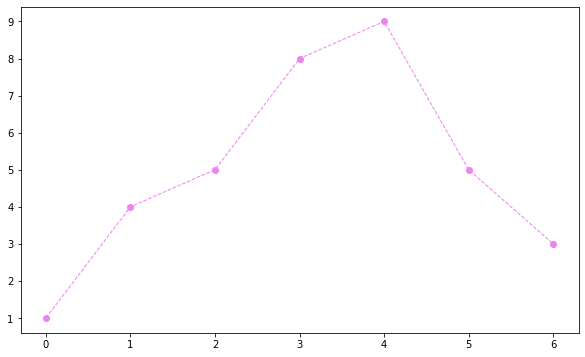

In [107]:
t=[0,1,2,3,4,5,6]
y=[1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t,y,color="violet",lw=1,linestyle="dashed",marker="o")
plt.show()

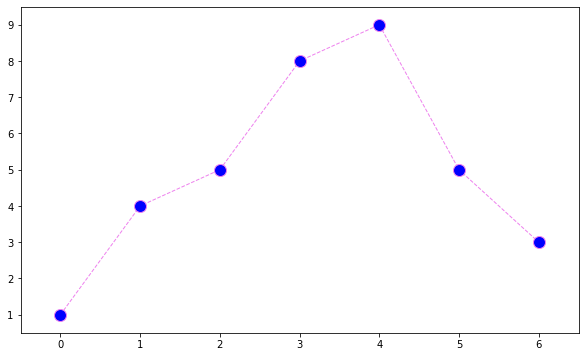

In [108]:
t=[0,1,2,3,4,5,6]
y=[1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t,y,color="violet",lw=1,linestyle="dashed",marker="o",markerfacecolor= "blue",markersize=12)

plt.xlim([-0.5,6.5]) # 그래프의 X, Y축이 표시되는 범위를 지정 (x limit인듯)
plt.ylim([0.5,9.5]) 
plt.show()

In [109]:
t=np.array(list(range(10)))
y=np.array([9,8,7,9,8,3,2,4,3,4])

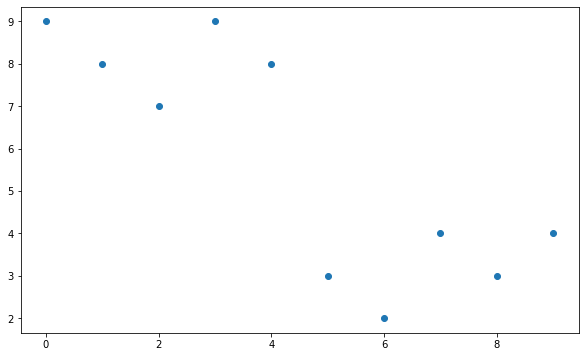

In [110]:
plt.figure(figsize=(10,6))
plt.scatter(t,y) #산점도
plt.show()

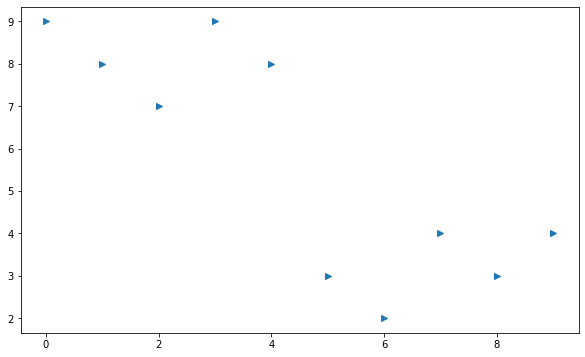

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(t,y,marker=">") #산점도 marker지정 가능(중요)!!
plt.show()

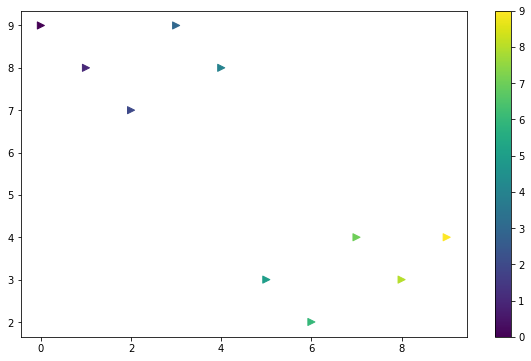

In [112]:
colormap = t #어느 축값에 따라 변할지 정의, colormap으로 x축값에 따라 색 변경 ㄱㄴ

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker=">")#산점도 marker지정 가능(중요)!! s는 size, c는 color  c=colormap=t 
plt.colorbar()
plt.show()

In [113]:
s1 = np.random.normal(loc=0,scale=1,size=1000)  #loc으로 평균값,  scale로 표준편차 지정.
s2= np.random.normal(loc=5,scale=0.5,size=1000)
s3= np.random.normal(loc=10,scale=2,size=1000)

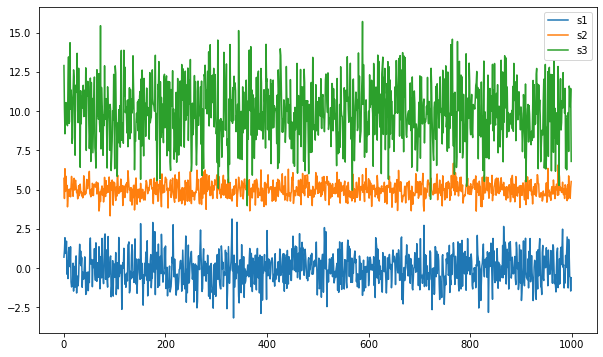

In [114]:
plt.figure(figsize=(10,6))
plt.plot(s1,label='s1')
plt.plot(s2,label='s2')
plt.plot(s3,label='s3')
plt.legend()
plt.show()

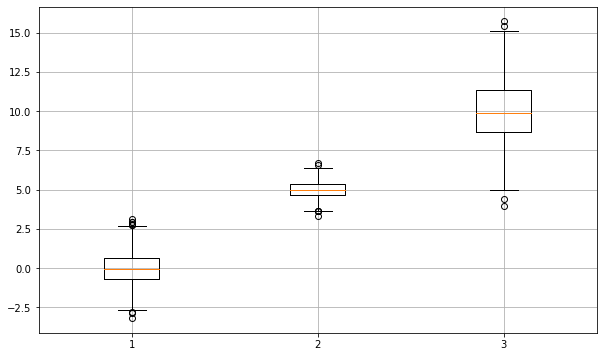

In [115]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()

In [116]:
from matplotlib import font_manager,rc  #matplotlib은 기본적으로 한글폰트를 지원하지 않아 따로 처리 필요함.
plt.rcParams['axes.unicode_minus'] = False
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name() #font_manager를 통해 font name을 얻어오는 모습 
rc('font',family=font_name)

In [117]:
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1772,16.578947,155106,146029,9077,27605,5.852127,17.797506
용산구,2383,66.570605,240665,226378,14287,38884,5.936468,16.156899
성동구,3602,29.835698,295767,289162,6605,45591,2.233177,15.414499
광진구,2588,57.009926,355306,342481,12825,50815,3.609565,14.301757
동대문구,2497,26.670259,352259,338040,14219,61262,4.036519,17.391181


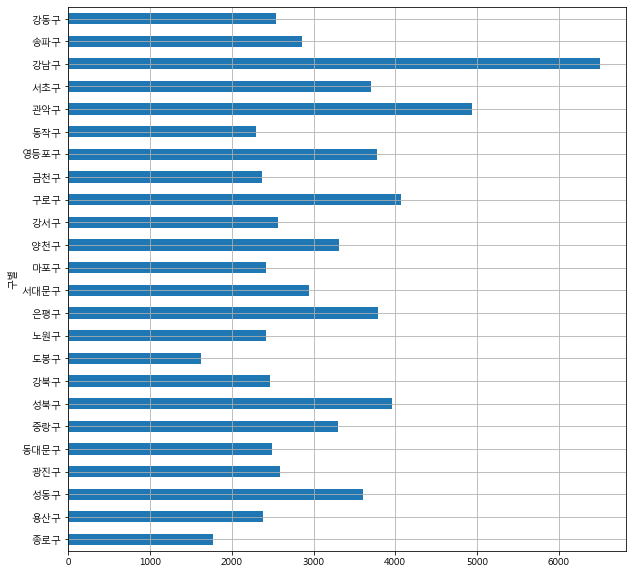

In [121]:
data_result['총계'].plot(kind='barh',grid=True,figsize=(10,10))  #barh =bar horizonal(수평바) / 그냥 bar는 우리가 아는 수직막대 
#pandas data는 plot을 뒤에 붙이기만 하면 바로 그래프를 그릴 수 있다!!!
plt.show()

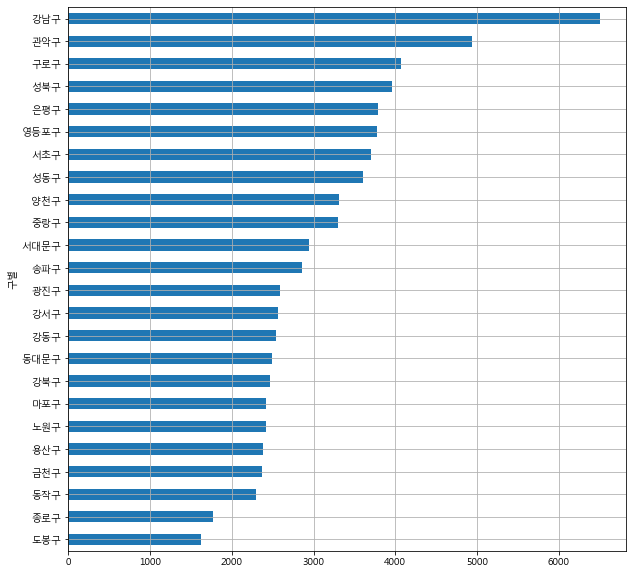

In [125]:
data_result['총계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10)) #기본이 오름차순/ 수평바는 정렬을 해놔야 보기 편함.
plt.show()

In [126]:
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1772,16.578947,155106,146029,9077,27605,5.852127,17.797506
용산구,2383,66.570605,240665,226378,14287,38884,5.936468,16.156899
성동구,3602,29.835698,295767,289162,6605,45591,2.233177,15.414499
광진구,2588,57.009926,355306,342481,12825,50815,3.609565,14.301757
동대문구,2497,26.670259,352259,338040,14219,61262,4.036519,17.391181


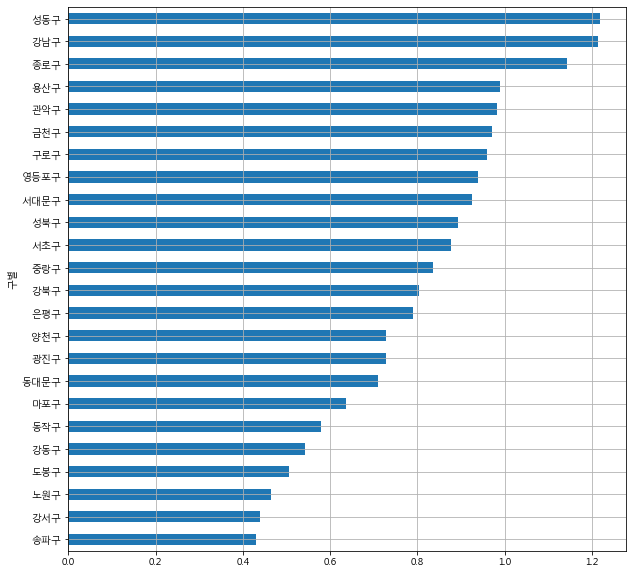

In [127]:
data_result['CCTV비율'] = 100* data_result['총계']/ data_result['인구수']
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))

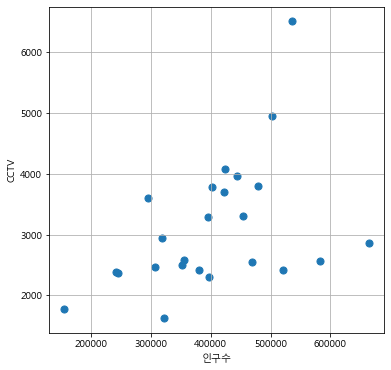

In [128]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['총계'],s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [129]:
fp1=np.polyfit(data_result['인구수'],data_result['총계'],1) #polyfit을 통해 직선의 기울기와 y절편 얻기 ㅋ
fp1

array([4.07016119e-03, 1.47368136e+03])

In [130]:
f1=np.poly1d(fp1) #일차함수를 만들었다.
fx=np.linspace(100000,700000,100) #인구수 기반으로 x축 데이터 만들기 위함 

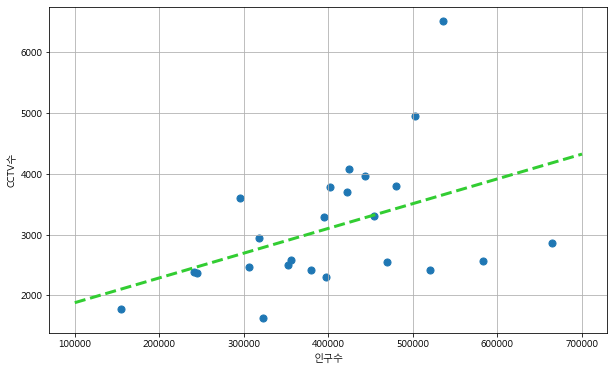

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(data_result['인구수'],data_result['총계'],s=50)
plt.plot(fx,f1(fx),ls="dashed",lw=3,color="limegreen")
plt.xlabel("인구수")
plt.ylabel("CCTV수")
plt.grid()
plt.show()

In [133]:
data_result['오차'] = np.abs(data_result['총계'] - f1(data_result['인구수']))  #numpy에서 abs(절댓값) 불러올 수 있음.
df_sort = data_result.sort_values(by="오차",ascending= False)
df_sort.head()


,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,6502,36.906030,536107,531375,4732,76184,0.882660,14.210596,1.212818,2846.276732
관악구,4942,26.929260,502698,488800,13898,78647,2.764682,15.644980,0.983095,1422.256748
송파구,2854,101.079914,664341,658670,5671,95164,0.853628,14.324571,0.429599,1323.656318
강서구,2560,62.608696,582995,577519,5476,90404,0.939288,15.506823,0.439112,1286.564985
노원구,2415,53.713528,520005,515997,4008,86697,0.770762,16.672340,0.464419,1175.185532


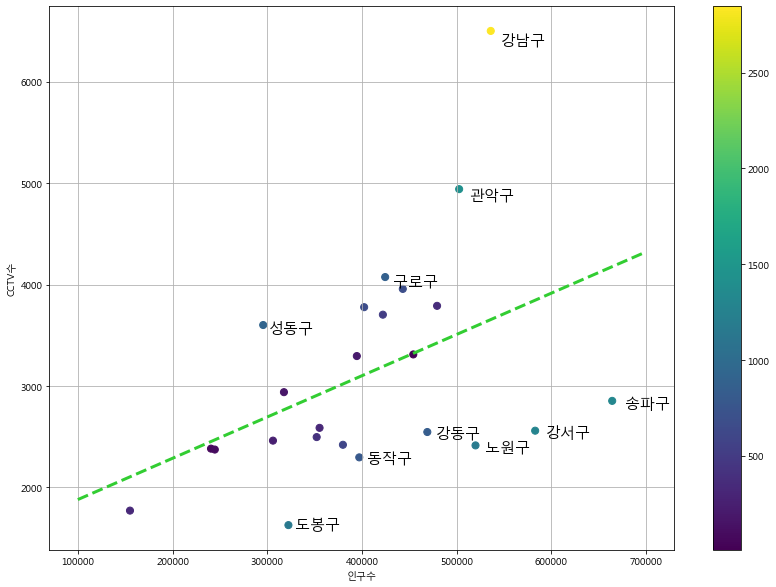

In [136]:

plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['총계'],c=data_result['오차'],s=50)   #c에 직접 색을 변하게 하는 요소를 입력해도 됨
plt.plot(fx,f1(fx),ls="dashed",lw=3,color="limegreen")


for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02,df_sort['총계'][n]*0.98,  # TEXT를 입력할 x,y 위치를 잡기 위해 약간씩 이동시킨것임(*1.02,*0.98)
             df_sort.index[n],fontsize=15)
    
    #plt.text(x,y,'your text')
    
plt.xlabel("인구수")
plt.ylabel("CCTV수")

plt.colorbar() #colormap 대신 colorbar 사용 
plt.grid()
plt.show()

## 강남구는 인구 대비 CCTV 개수 원탑(인구 100명당 1개 이상), 그냥 CCTV 개수도 원탑. 일반적인 경향(1차함수)과도 제일 떨어져 있음
## 송파구는 서울시에서 인구가 제일 많지만 회귀선을 많이 하회하는 실망스러운 모습.

## 내가 사는 노원구도 인구대비 CCTV개수에서 아쉬운 모습.

## 구로구, 관악구, 성동구는 CCTV 선진구 ! 